# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Izzat Arroyyan
- **Email:** izzatarroyyan11@gmail.com
- **ID Dicoding:** izzatarroyyan

## Data Source
Brazilian E-Commerce Public Dataset by Olist

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana hubungan antara selisih waktu pengiriman aktual dan estimasi pengiriman terhadap skor ulasan yang diberikan oleh pelanggan?
- Pertanyaan 2: Bagaimana perkembangan penggunaan metode pembayaran di Olist dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- **Pandas** : Untuk manipulasi dan analisis data
- **NumPy** : Untuk operasi numeris
- **Matplotlib dan Seaborn** : Untuk visualisasi data



## Data Wrangling

### Gathering Data

In [5]:
# Define the base path for the dataset
base_path = "data/"

# Read the relevant CSV files using the base path
orders_df = pd.read_csv(base_path + "orders_dataset.csv")
order_reviews_df = pd.read_csv(base_path + "order_reviews_dataset.csv")
order_payments_df = pd.read_csv(base_path + "order_payments_dataset.csv")

In [6]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Kolom-kolom dalam tabel-tabel ini memberikan kemampuan untuk menganalisis berbagai aspek dari proses pemesanan, termasuk kepuasan pelanggan (melalui ulasan), tren pembayaran, dan kinerja pengiriman.
- Kolom order_id berfungsi sebagai titik penghubung yang krusial antara ketiga tabel, memungkinkan analisis terintegrasi seperti membandingkan waktu pengiriman dengan skor ulasan dan metode pembayaran.

### Assessing Data

In [9]:
print(orders_df.info())
print(order_payments_df.info())
print(order_reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null 

**Insight:**
- Tabel pesanan (orders) memiliki 8 kolom dengan beberapa nilai yang hilang pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Hal ini menunjukkan bahwa data pengiriman mungkin tidak sepenuhnya konsisten, yang dapat mempengaruhi analisis yang berkaitan dengan waktu pengiriman dan kepuasan pelanggan.
- Sebagian besar kolom di tabel pesanan bertipe objek, sedangkan di tabel pembayaran dan ulasan terdapat kombinasi tipe data numerik (integer dan float). Ini menunjukkan bahwa beberapa kolom waktu perlu diubah menjadi tipe data datetime untuk memungkinkan analisis waktu yang lebih efisien, seperti menghitung durasi pengiriman.
- Kolom order_id di semua tabel berfungsi sebagai kunci utama untuk menghubungkan data antar tabel. Hal ini memfasilitasi integrasi dan analisis lintas data, memungkinkan untuk analisis komprehensif mengenai hubungan antara pengiriman, pembayaran, dan ulasan pelanggan.
- Dengan total 99,441 entri di tabel pesanan dan 103,886 entri di tabel pembayaran, jumlah data yang tersedia cukup besar untuk menghasilkan analisis yang signifikan dan dapat diandalkan. Namun, penting untuk memperhatikan entri yang tidak memiliki nilai pada kolom tertentu yang dapat mempengaruhi kualitas analisis.

### Cleaning Data

#### Pertanyaan 1
Menggabungkan dua tabel (orders_df dan order_reviews_df) menjadi ratings_df, tabel yang siap untuk dianalisis

In [10]:
# Outer join the orders and order_reviews DataFrames
ratings_df = pd.merge(orders_df, order_reviews_df, on='order_id', how='outer')

# Convert date columns to datetime format
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_columns:
    ratings_df[col] = pd.to_datetime(ratings_df[col], errors='coerce')

# Drop rows where order_status is not 'delivered'
ratings_df = ratings_df[ratings_df['order_status'] == 'delivered']

# Drop unnecessary columns
columns_to_drop = [
    'review_comment_title',
    'review_comment_message',
    'review_creation_date',
    'review_answer_timestamp'
]
ratings_df = ratings_df.drop(columns=columns_to_drop)

# Drop rows with any NaN value
ratings_df = ratings_df.dropna()

In [11]:
# Find duplicated rows across all columns
duplicated_rows = ratings_df[ratings_df.duplicated(keep=False)]  # keep=False returns all duplicates

# Display the duplicated rows
print(duplicated_rows)

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, review_id, review_score]
Index: []


In [12]:
# Display the resulting DataFrame
ratings_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,97ca439bc427b48bc1cd7177abe71365,5.0
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,7b07bacd811c4117b742569b04ce3580,4.0
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,0c5b33dea94867d1ac402749e5438e8b,5.0
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,f4028d019cb58564807486a6aaf33817,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,940144190dcba6351888cafa43f3a3a5,5.0


**Insight:**

- **Proses Pembersihan Data**: Selama proses pembersihan, kami menghapus entri dengan status pesanan yang tidak "delivered" dan menghapus kolom yang tidak diperlukan, serta menghilangkan baris yang memiliki nilai NaN pada kolom penting. Ini memastikan bahwa analisis yang dilakukan hanya berdasarkan data yang relevan dan berkualitas tinggi.

#### Pertanyaan 2
Menggabungkan dua tabel (orders_df dan order_payments_df) menjadi payments_df, tabel yang siap untuk dianalisis

In [13]:
# Outer join the orders and order_reviews DataFrames
payments_df = pd.merge(orders_df, order_payments_df, on='order_id', how='outer')

# Convert purchase timestamp column to datetime format
payments_df['order_purchase_timestamp'] = pd.to_datetime(payments_df['order_purchase_timestamp'], errors='coerce')

# Drop unnecessary columns
columns_to_drop2 = [
    'order_status',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
payments_df = payments_df.drop(columns=columns_to_drop2)

# Drop rows with any NaN value
payments_df = payments_df.dropna()

In [14]:
# Find duplicated rows across all columns
duplicated_rows2 = payments_df[payments_df.duplicated(keep=False)]  # keep=False returns all duplicates

# Display the duplicated rows
print(duplicated_rows)

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, review_id, review_score]
Index: []


In [15]:
payments_df.head()

,order_id,customer_id,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,1.0,credit_card,3.0,218.04


**Insight:**

- **Pembersihan Data**: Melalui penghapusan kolom yang tidak relevan dan baris dengan nilai NaN, dataset payments_df kini berfokus pada informasi penting yang diperlukan untuk analisis, memastikan kualitas data yang lebih baik. Setelah mengonversi kolom waktu ke format datetime dan melakukan outer join, payments_df memiliki struktur yang lebih terorganisir dengan kolom-kolom yang relevan, sehingga memudahkan analisis terkait pembayaran dan transaksi.

## Exploratory Data Analysis (EDA)

### Pertanyaan 1

In [16]:
ratings_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score
count,96338,96338,96338,96338,96338,96338.000000
mean,2018-01-01 20:07:09.416305152,2018-01-02 06:23:57.142321664,2018-01-05 01:28:07.195820800,2018-01-14 08:39:19.487263488,2018-01-25 13:52:47.572504832,4.155650
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000
25%,2017-09-13 22:19:19,2017-09-14 09:51:35.249999872,2017-09-18 13:51:40,2017-09-25 20:57:55.249999872,2017-10-05 00:00:00,4.000000
50%,2018-01-20 17:44:52.500000,2018-01-21 00:02:50.500000,2018-01-24 14:13:19.500000,2018-02-02 17:52:17.500000,2018-02-16 00:00:00,5.000000
75%,2018-05-05 16:09:48.750000128,2018-05-05 22:30:48.500000,2018-05-08 14:12:00,2018-05-15 21:16:30.750000128,2018-05-28 00:00:00,5.000000
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,5.000000
std,NaN,NaN,NaN,NaN,NaN,1.285028


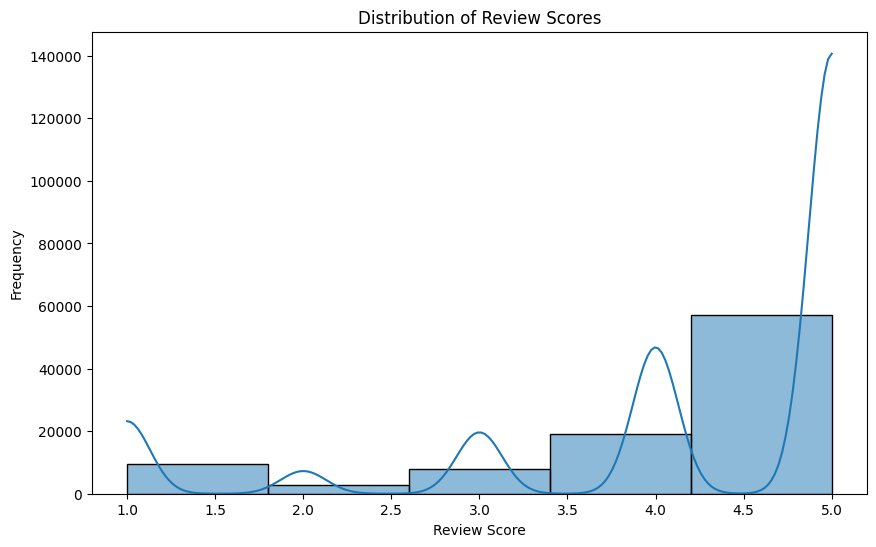

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['review_score'], bins=5, kde=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

**Insight untuk data ratings:**

- **Rata-rata Skor Ulasan**: Rata-rata skor ulasan pelanggan adalah 4,16, menunjukkan bahwa sebagian besar pelanggan puas dengan layanan yang diberikan.

- **Jumlah Data Ulasan**: Terdapat 96.338 ulasan valid yang dapat dianalisis, memberikan basis data yang kuat untuk memahami kepuasan pelanggan.

### Pertanyaan 2

In [18]:
payments_df.describe()

,order_purchase_timestamp,payment_sequential,payment_installments,payment_value
count,103886,103886.000000,103886.000000,103886.000000
mean,2017-12-29 21:48:47.671803648,1.092679,2.853349,154.100380
min,2016-09-04 21:15:19,1.000000,0.000000,0.000000
25%,2017-09-10 09:01:08.750000128,1.000000,1.000000,56.790000
50%,2018-01-17 14:07:54,1.000000,1.000000,100.000000
75%,2018-05-03 18:35:58.249999872,1.000000,4.000000,171.837500
max,2018-10-17 17:30:18,29.000000,24.000000,13664.080000
std,NaN,0.706584,2.687051,217.494064


In [19]:
# Count all unique values in the payment_type column
payment_type_counts = payments_df['payment_type'].value_counts()

# Print the results
print(payment_type_counts)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


In [20]:
# Hapus baris di payments_df dimana payment_type adalah 'not_defined'
payments_df = payments_df[payments_df['payment_type'] != 'not_defined']

## Visualization & Explanatory Analysis

### Pertanyaan 1
Bagaimana hubungan antara selisih waktu pengiriman aktual dan estimasi pengiriman terhadap skor ulasan yang diberikan oleh pelanggan?

In [21]:
# Pastikan kolom waktu dalam format datetime
ratings_df['order_delivered_customer_date'] = pd.to_datetime(ratings_df['order_delivered_customer_date'])
ratings_df['order_estimated_delivery_date'] = pd.to_datetime(ratings_df['order_estimated_delivery_date'])

# Hitung selisih waktu dalam hari
ratings_df['delivery_diff'] = (ratings_df['order_delivered_customer_date'] - ratings_df['order_estimated_delivery_date']).dt.days

# Statistik Deskriptif
print(ratings_df[['delivery_diff', 'review_score']].describe())

       delivery_diff  review_score
count   96338.000000  96338.000000
mean      -11.915506      4.155650
std        10.111873      1.285028
min      -147.000000      1.000000
25%       -17.000000      4.000000
50%       -12.000000      5.000000
75%        -7.000000      5.000000
max       188.000000      5.000000


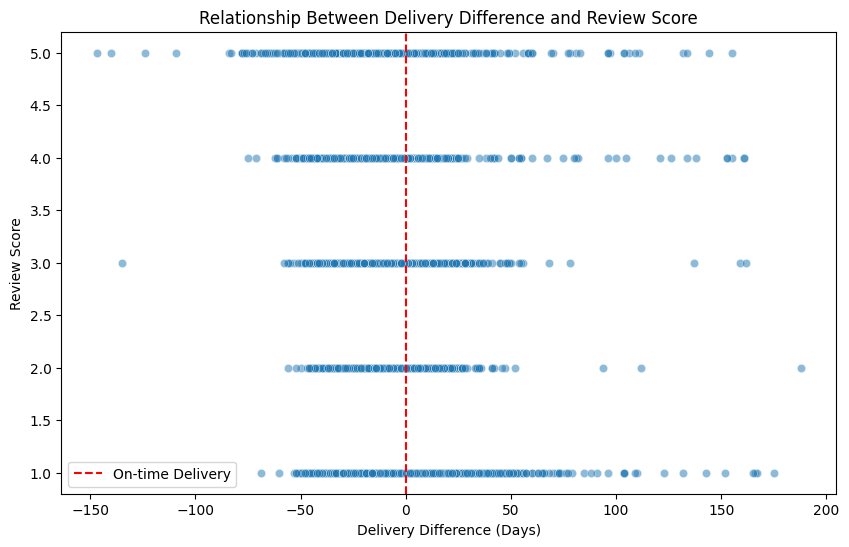

Correlation between delivery difference and review score: -0.27


In [22]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='delivery_diff', y='review_score', data=ratings_df, alpha=0.5)
plt.axvline(0, color='red', linestyle='--', label='On-time Delivery')
plt.title('Relationship Between Delivery Difference and Review Score')
plt.xlabel('Delivery Difference (Days)')
plt.ylabel('Review Score')
plt.legend()
plt.show()

# Correlation Calculation
correlation = ratings_df['delivery_diff'].corr(ratings_df['review_score'])
print(f"Correlation between delivery difference and review score: {correlation:.2f}")


Dari grafik di atas, terlihat adanya tren pergeseran dari kiri atas ke kanan bawah, di mana pengiriman yang lebih cepat cenderung mendapatkan skor ulasan 5 yang sedikit lebih tinggi.

Namun, dengan nilai korelasi sebesar -0,27, hubungan antara selisih waktu pengiriman (delivery difference) dan skor ulasan pelanggan terbilang lemah. Ini berarti bahwa meskipun pengiriman yang lebih lambat dari estimasi sedikit cenderung menghasilkan skor ulasan yang lebih rendah, hubungan tersebut tidak cukup kuat untuk menyimpulkan bahwa keterlambatan pengiriman selalu berpengaruh signifikan terhadap skor ulasan.

### Pertanyaan 2
Bagaimana perkembangan penggunaan metode pembayaran di Olist dari waktu ke waktu?

In [23]:
# Konversi kolom waktu ke format datetime
payments_df['order_purchase_timestamp'] = pd.to_datetime(payments_df['order_purchase_timestamp'])

# Tambahkan kolom periode bulanan (misalnya, 'Jan 18')
payments_df['purchase_month'] = payments_df['order_purchase_timestamp'].dt.to_period('M')

In [24]:
# Hitung jumlah transaksi berdasarkan bulan dan metode pembayaran
payment_trends = payments_df.groupby(['purchase_month', 'payment_type']).size().reset_index(name='count')

# Pivot untuk mendapatkan format tabel yang mudah divisualisasikan
payment_trends_pivot = payment_trends.pivot(index='purchase_month', columns='payment_type', values='count').fillna(0)

# Ubah kembali indeks periode ke format string untuk visualisasi yang lebih rapi
payment_trends_pivot.index = payment_trends_pivot.index.strftime('%b %y')  # Format seperti 'Jan 18'

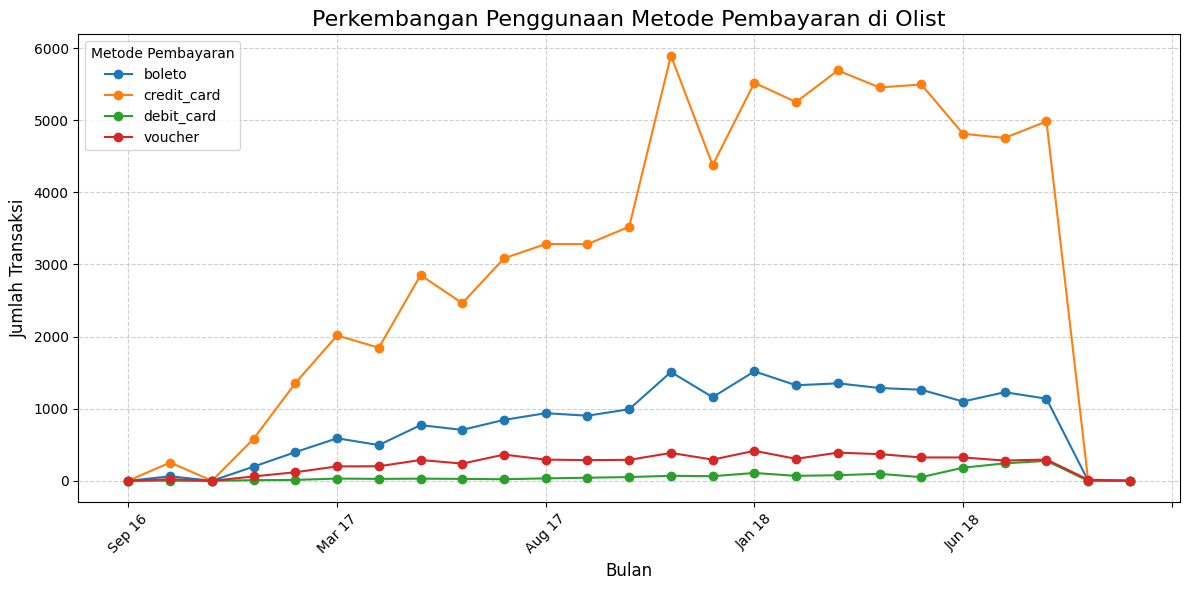

In [25]:
# Plot line chart
plt.figure(figsize=(12, 6))
payment_trends_pivot.plot(kind='line', marker='o', ax=plt.gca())

# Tambahkan label dan judul
plt.title('Perkembangan Penggunaan Metode Pembayaran di Olist', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.xticks(rotation=45)  # Memiringkan label x-axis agar lebih terbaca
plt.legend(title='Metode Pembayaran', loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Tampilkan plot
plt.show()

Data pada bulan pertama (September 2016) dan dua bulan terakhir (September-Oktober 2018) menunjukkan jumlah yang tidak signifikan, sehingga dihapus untuk meningkatkan kualitas analisis.

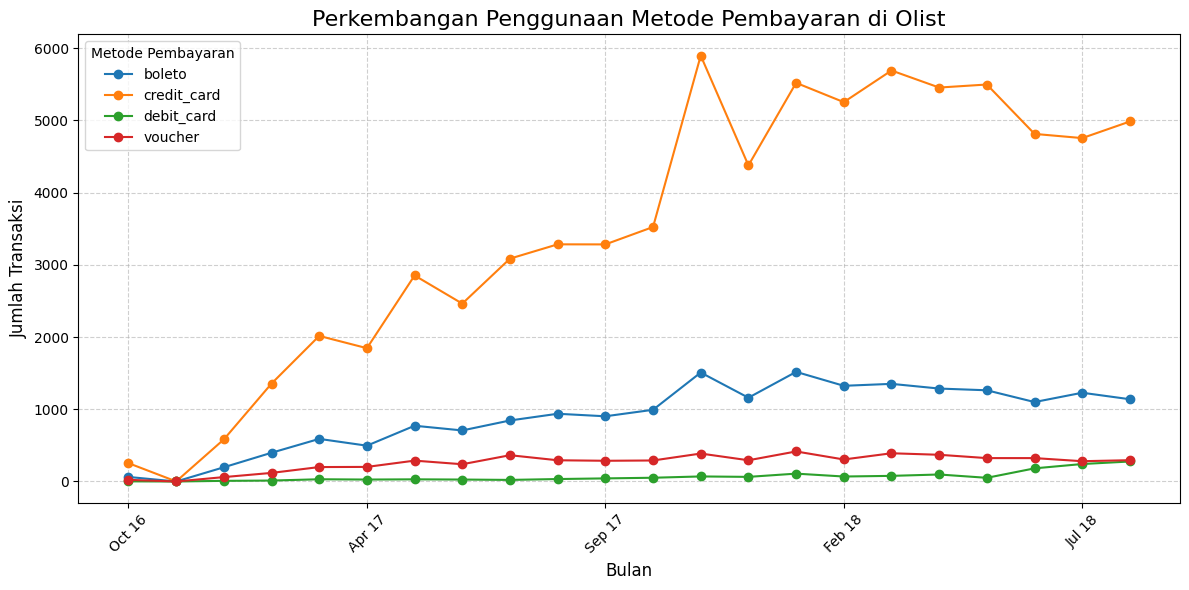

In [26]:
# Drop the first month and the last two months from the pivot table
payment_trends_pivot = payment_trends_pivot.iloc[1:-2]

# Plot line chart after filtering
plt.figure(figsize=(12, 6))
payment_trends_pivot.plot(kind='line', marker='o', ax=plt.gca())

# Add labels and title
plt.title('Perkembangan Penggunaan Metode Pembayaran di Olist', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Metode Pembayaran', loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
payment_trends_pivot

payment_type,boleto,credit_card,debit_card,voucher
purchase_month,,,,
Oct 16,63.0,254.0,2.0,23.0
Dec 16,0.0,1.0,0.0,0.0
Jan 17,197.0,583.0,9.0,61.0
Feb 17,398.0,1356.0,13.0,119.0
Mar 17,590.0,2016.0,31.0,200.0
Apr 17,496.0,1846.0,27.0,202.0
May 17,772.0,2853.0,30.0,289.0
Jun 17,707.0,2463.0,27.0,239.0
Jul 17,845.0,3086.0,22.0,364.0


In [28]:
# Hitung total transaksi per bulan
payment_trends_pivot['total'] = payment_trends_pivot.sum(axis=1)

# Hitung persentase tiap pembayaran per bulan
payment_percentage = payment_trends_pivot.div(payment_trends_pivot['total'], axis=0) * 100

# Hapus kolom total karena kita hanya butuh persentase
payment_percentage = payment_percentage.drop(columns='total')

C:\Users\MSI GAMING\AppData\Local\Temp\ipykernel_18716\829715863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment_trends_pivot['total'] = payment_trends_pivot.sum(axis=1)


<Figure size 1200x600 with 0 Axes>

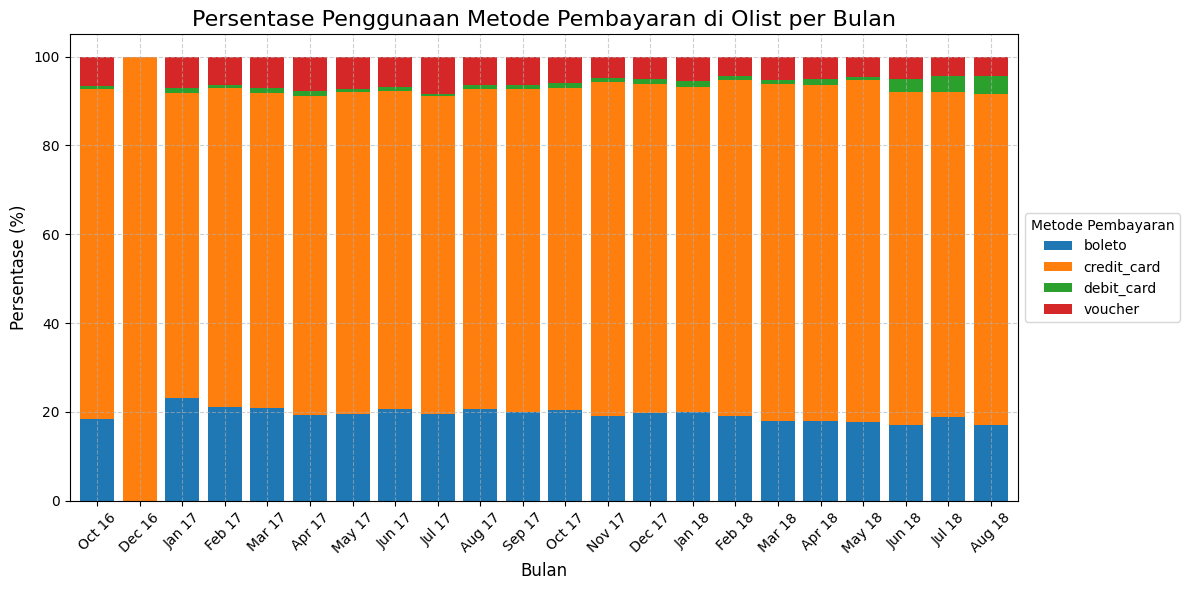

In [29]:
# Plot stacked bar chart
plt.figure(figsize=(12, 6))
payment_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.8)

# Tambahkan label dan judul
plt.title('Persentase Penggunaan Metode Pembayaran di Olist per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.xticks(rotation=45)  # Memiringkan label x-axis agar lebih terbaca
# Pindahkan legend ke kanan luar plot
plt.legend(title='Metode Pembayaran', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Tampilkan plot
plt.show()

**Insight:**
-  **Dominasi Pembayaran dengan Kartu Kredit**: Kartu kredit (credit_card) mendominasi transaksi sepanjang periode.

-  **Peningkatan Jumlah Transaksi Secara Keseluruhan**: Jumlah transaksi meningkat secara konsisten sepanjang periode, dengan puncak pada November 2017.

-  **Fluktuasi yang Signifikan**: Transaksi menunjukkan fluktuasi tinggi, dengan puncak yang mungkin terkait dengan promosi atau kampanye tertentu.

-  **Stagnasi Boleto dan Voucher, Peningkatan Debit Card**: Transaksi menggunakan Boleto dan voucher stagnan di beberapa bulan terakhir, sementara debit card meningkat signifikan dari Mei hingga Juli 2018, hampir menyamai voucher.

## Analisis Lanjutan (Opsional)

### Pertanyaan 1

- **Cek Kota Pengiriman atau Kota Penerimaan dengan Waktu Kirim yang Lama**:
Analisis lebih lanjut dapat dilakukan untuk mengetahui apakah terdapat kota tertentu yang selalu memiliki waktu pengiriman yang lebih lama dibandingkan dengan kota lainnya. Hal ini dapat membantu untuk mengidentifikasi wilayah dengan masalah logistik yang lebih besar.
- **Cari Tipe Barang yang Umumnya Pengirimannya Lama**:
Beberapa kategori barang, seperti barang besar atau berat, mungkin memerlukan waktu pengiriman yang lebih lama. Mengidentifikasi tipe barang yang sering mengalami keterlambatan bisa memberikan informasi untuk perbaikan sistem pengiriman.
- **Faktor Lain yang Mungkin Berkorelasi dengan Rating Review:**
Selain waktu pengiriman, faktor lain seperti kondisi produk dan lain-lain bisa berpengaruh pada skor ulasan. Analisis lebih lanjut terhadap hubungan antara variabel-variabel tersebut dapat membantu memahami lebih dalam apa yang memengaruhi kepuasan pelanggan.


### Pertanyaan 2
- **Cek Apakah Pengguna Beralih ke Metode Pembayaran Tertentu**:
Dengan menganalisis perubahan penggunaan metode pembayaran dari waktu ke waktu, kita dapat mengetahui apakah pelanggan cenderung beralih ke metode pembayaran lain, seperti debit card atau pembayaran lain, sebagai respons terhadap promosi atau perubahan kebijakan perusahaan.
- **Analisis Berdasarkan Lokasi Geografis**:
Menganalisis perbedaan dalam penggunaan metode pembayaran di berbagai wilayah dapat memberikan wawasan tentang kebiasaan atau preferensi lokal dalam memilih metode pembayaran. Ini dapat membantu perusahaan merancang strategi yang lebih sesuai dengan karakteristik geografis pelanggan.

## Conclusion

### Pertanyaan 1
- **Keterlambatan Pengiriman Memengaruhi Skor Ulasan Secara Negatif, namun Tidak Signifikan**:
Meskipun ada hubungan negatif yang lemah antara selisih waktu pengiriman dan skor ulasan, pengaruh keterlambatan pengiriman terhadap skor ulasan pelanggan cenderung kecil dan tidak signifikan.
- **Faktor Lain Selain Pengiriman Memengaruhi Skor Ulasan**:
Kualitas produk, kemudahan pembayaran, dan reputasi produsen bisa saja memiliki dampak yang lebih besar terhadap skor ulasan. Oleh karena itu, perusahaan harus menganalisis secara keseluruhan aspek-aspek untuk meningkatkan skor ulasan.


### Pertanyaan 2
- **Dominasi Kartu Kredit**:
Kartu kredit tetap menjadi pilihan utama dalam transaksi Olist, menunjukkan dominasi yang kuat dalam metode pembayaran. Oleh karena itu, perusahaan perlu terus mendorong penggunaan kartu kredit, terutama melalui promosi dan penawaran khusus.
- **Peningkatan Debit Card dan Penurunan Boleto/Voucher**:
Penggunaan debit card meningkat, sementara boleto dan voucher menunjukkan stagnasi, yang menandakan bahwa pelanggan lebih memilih metode pembayaran yang lebih cepat dan lebih praktis. Perusahaan perlu lebih fokus pada promosi untuk debit card agar bisa memanfaatkan tren ini.
- **Pengaruh Musiman dan Kampanye terhadap Pembayaran**:
Fluktuasi penggunaan metode pembayaran terkait dengan kampanye atau musim tertentu menunjukkan bahwa promosi yang tepat waktu dapat mendorong pelanggan untuk memilih metode pembayaran tertentu. Oleh karena itu, perusahaan harus merancang kampanye musiman yang mendorong pilihan pembayaran yang menguntungkan.